In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(); sns.set_theme(style='white')

import datetime

from prophet import Prophet

In [2]:
sales = pd.read_csv("./data/sales_train.csv")

In [3]:
sales.shape

(2935849, 6)

In [4]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [6]:
sales.describe().T

,count,mean,std,min,25%,50%,75%,max
date_block_num,2935849.0,14.569911,9.422988,0.0,7.0,14.0,23.0,33.0
shop_id,2935849.0,33.001728,16.226973,0.0,22.0,31.0,47.0,59.0
item_id,2935849.0,10197.227057,6324.297354,0.0,4476.0,9343.0,15684.0,22169.0
item_price,2935849.0,890.853233,1729.799631,-1.0,249.0,399.0,999.0,307980.0
item_cnt_day,2935849.0,1.242641,2.618834,-22.0,1.0,1.0,1.0,2169.0


In [7]:
sales["date"] = sales["date"].apply(lambda x: datetime.datetime.strptime(x, "%d.%m.%Y"))
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [8]:
ts = sales.groupby(["date_block_num"])["item_cnt_day"].sum()
# ts.astype("float")

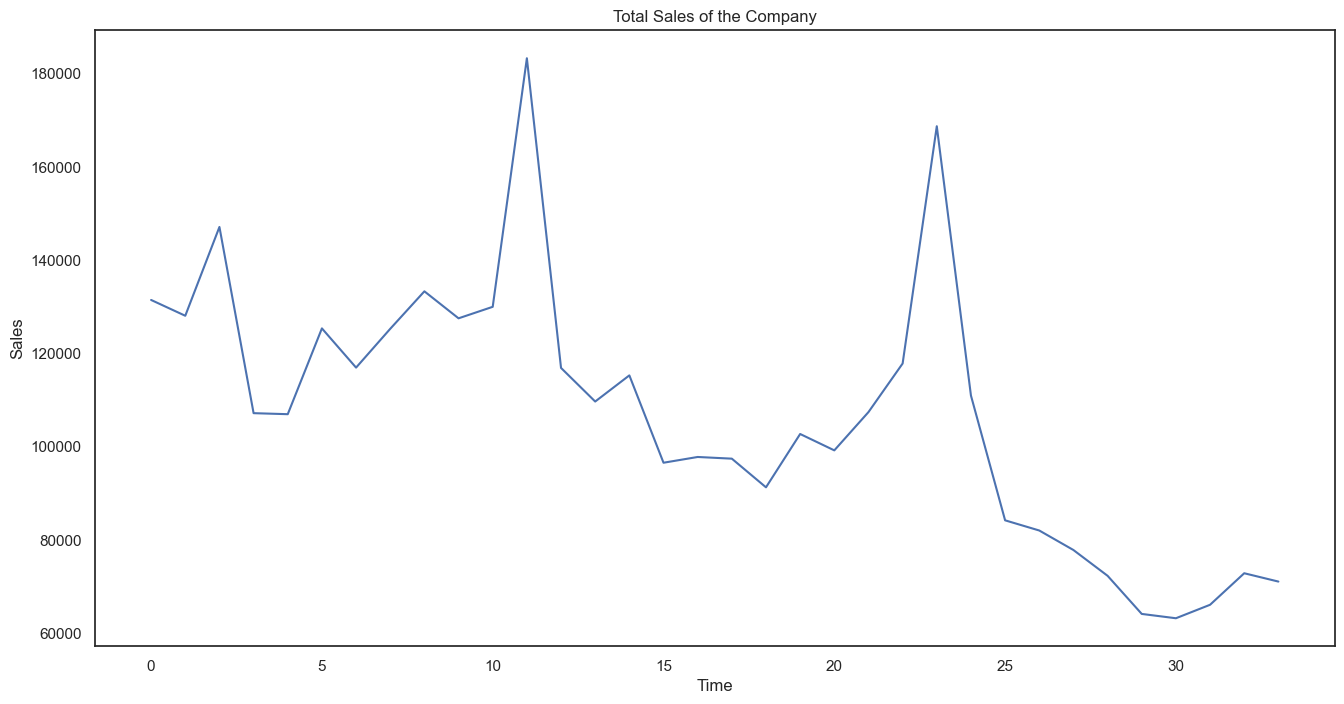

In [9]:
plt.figure(figsize=(16, 8))
plt.title("Total Sales of the Company")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.plot(ts)
plt.show()

In [10]:
ts.index = pd.date_range(start="2013-01-01", end="2015-10-01", freq="MS")
ts = ts.reset_index()
ts.columns = ["ds", "y"]
ts.head()

,ds,y
0,2013-01-01,131479.0
1,2013-02-01,128090.0
2,2013-03-01,147142.0
3,2013-04-01,107190.0
4,2013-05-01,106970.0


In [11]:
model = Prophet(yearly_seasonality=True)

In [12]:
model.fit(ts)

11:47:08 - cmdstanpy - INFO - Chain [1] start processing
11:47:08 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
future = model.make_future_dataframe(periods=5, freq="MS")

In [14]:
forecast = model.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
34,2015-11-01,83193.967503,79929.791982,86276.675779
35,2015-12-01,125513.233025,122163.719063,128567.460342
36,2016-01-01,75625.686521,72421.499166,78576.024156
37,2016-02-01,40109.308318,36899.619969,43411.452939
38,2016-03-01,76664.068735,73406.594230,80033.965677


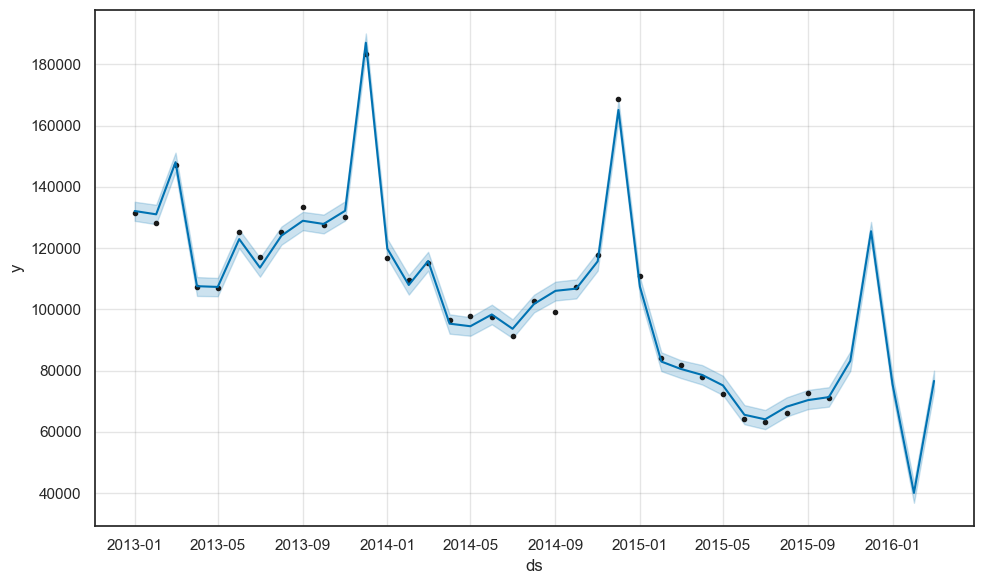

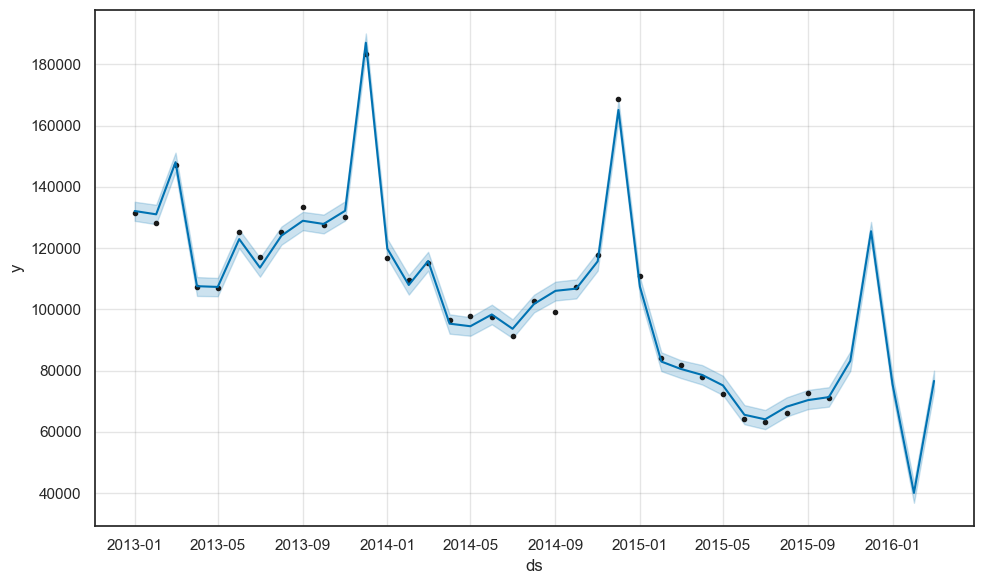

In [15]:
model.plot(forecast)

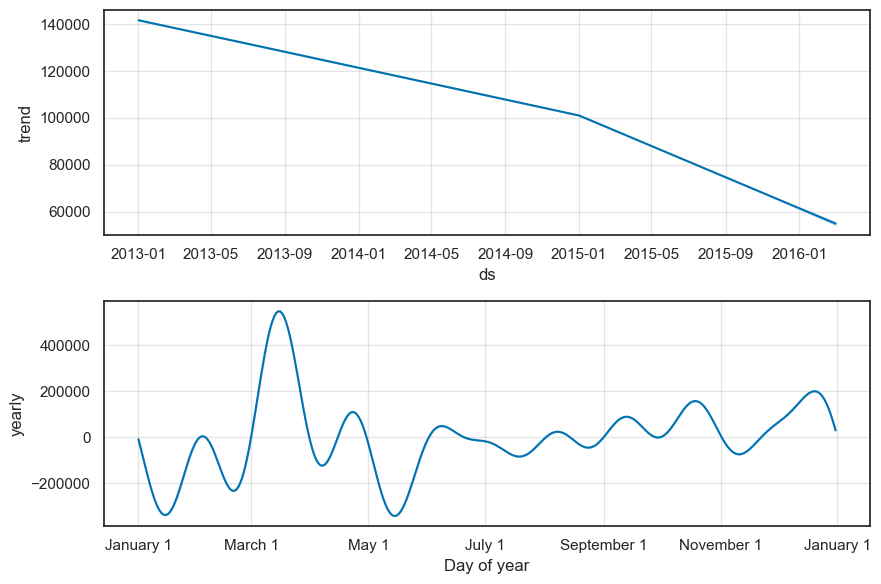

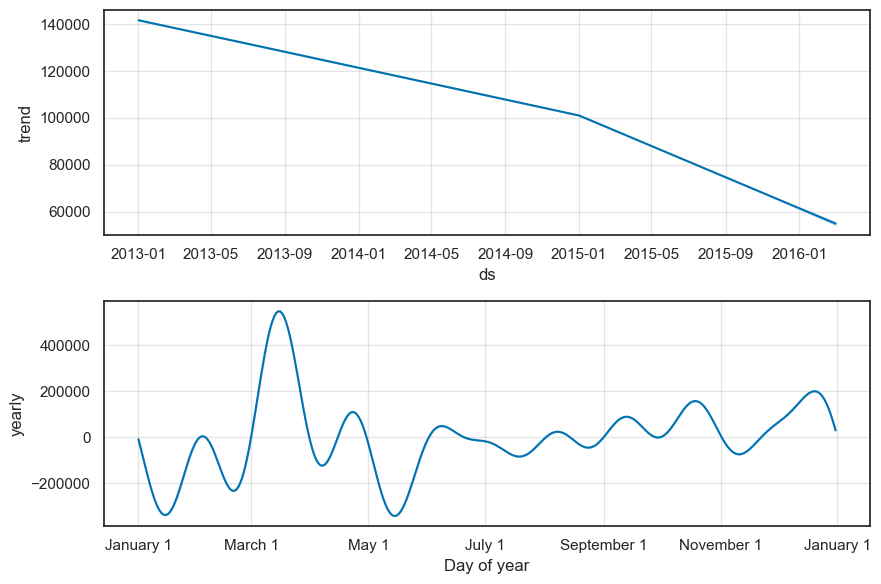

In [16]:
model.plot_components(forecast)